# Lottery Strategy Test
Is using the same lottery numbers every time a better strategy than randomly chosing every time? My intuition says no, but let's find out via simulation!!

In [1]:
import numpy as np
import matplotlib.pyplot as plt

First let's define the lottery setup:

In [5]:
number_pool = 20  # Integers that can be chosen
number_size = 5   # Number of chosen numbers

In [29]:
my_numbers_same = np.array([7,10,7,12,1])
my_numbers_same

array([ 7, 10,  7, 12,  1])

In [233]:
my_numbers_rand = np.random.choice(number_pool, number_size)
my_numbers_rand

array([16,  8,  8,  2, 15])

In [22]:
lottery_numbers = np.random.choice(number_pool, number_size)
lottery_numbers

array([ 7, 10,  7, 12,  1])

Does order matter? If not:

In [30]:
order_matters = "no"
if order_matters == 'no':
    my_numbers_same.sort()
    my_numbers_rand.sort()
    lottery_numbers.sort()

In [31]:
results = my_numbers_same == lottery_numbers
results

array([ True,  True,  True,  True,  True])

In [32]:
results.min()

True

Let's put this all together in a function:

In [235]:
def lottery_test(number_pool=10, number_size=3, order_matters = 'no'):
    count_same = 0
    count_rand = 0
    my_numbers_same = np.random.choice(number_pool, number_size) # randomly chosing this once
    
    results_stop = [0,0]    
    while sum(results_stop) < 2:
        my_numbers_rand = np.random.choice(number_pool, number_size)
        lottery_numbers = np.random.choice(number_pool, number_size)
        
        if order_matters == 'no':
            my_numbers_same.sort()
            my_numbers_rand.sort()
            lottery_numbers.sort()
            
        results_same = my_numbers_same == lottery_numbers    
        results_rand = my_numbers_rand == lottery_numbers
        
        if results_stop[0] == 0 and results_same.min() == False:
            count_same += 1
        else:
            results_stop[0] = 1
            
        if results_stop[1] == 0 and results_rand.min() == False:
            count_rand += 1
        else:
            results_stop[1] = 1  
     
    count_same_rand = [count_same, count_rand]
    return count_same_rand

In [237]:
lottery_test(number_pool=10, number_size=3, order_matters='no')

[137, 63]

In [209]:
tries_same = []
tries_rand = []
same_win = []
for i in range(1000):
    tries_same.append(lottery_test()[0])
    tries_rand.append(lottery_test()[1])
    if lottery_test()[0] < lottery_test()[1]:
        same_win.append(1)
    else:
        same_win.append(0)

In [210]:
same_win_frac = sum(same_win)/len(same_win)
same_win_frac

0.496

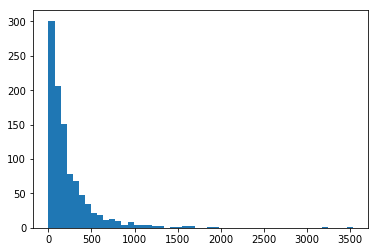

In [238]:
plt.hist(tries_same, bins=50);

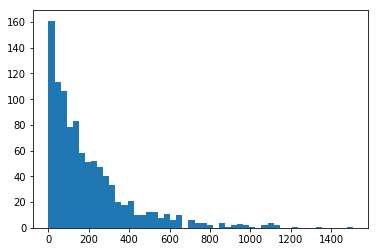

In [239]:
plt.hist(tries_rand, bins=50);